# Importing Libraries

In [181]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib as map
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

# Data Import

We are creating a function to import the data and append all the data to the environment data frame.

In [182]:


#Creating an empty dataframe.
df = pd.DataFrame()
#Printing shape of the dataframe
print(df.shape)

def read_merge_data (file_path):
    global df
    var_tab = pd.read_parquet(file_path)
    df = pd.concat([df,var_tab], ignore_index = True)
    print(f"{df.shape} records hvae been appended")

file_name = [
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-04.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-05.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-06.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-07.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-08.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-09.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-10.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-11.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-12.parquet',
    'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-01.parquet']
    
    
#Calling the defined function [read_merge(file_path)] to import data
for i in file_name:
    print(f"Loading {i} file.")
    read_merge_data(i)
    print(f"-----------------------------------File Loaded {i} ----------------------------------------")


(0, 0)
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet file.
(62495, 20) records hvae been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet file.
(131894, 20) records hvae been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet file.
(210431, 20) records hvae been appended
-----------------------------------File Loaded https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet ----------------------------------------
Loading https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-04.parquet file.
(

In [183]:
#importing taxi zone data
taxizonefilepath = 'taxi+_zone_lookup.csv'
taxizone_df = pd.read_csv(taxizonefilepath)
print(taxizone_df.shape)
print(taxizone_df.info())
taxizone_df.head(5)

(265, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       265 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB
None


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [184]:
#importing holidays
holidaysfilepath = 'Holidays.csv'
holidays_df = pd.read_csv(holidaysfilepath)
print(holidays_df.shape)
print(holidays_df.info())
holidays_df.head(5)

(13, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Holidays  13 non-null     object
dtypes: object(1)
memory usage: 232.0+ bytes
None


,Holidays
0,2022-01-01
1,2022-01-17
2,2022-02-21
3,2022-05-30
4,2022-07-04


# Data Exploration

Dimensions of dataset: rows and columns

In [185]:
df.shape

(908613, 20)

In [186]:
taxizone_df.shape

(265, 4)

In [187]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [188]:
df.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
908608,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,None,1.0,16.70,NaN,NaN,NaN
908609,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,None,1.0,5.41,NaN,NaN,NaN
908610,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,None,1.0,21.04,NaN,NaN,NaN
908611,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,None,1.0,19.18,NaN,NaN,NaN
908612,2,2023-01-31 23:51:00,2023-02-01 00:07:00,None,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,None,1.0,29.40,NaN,NaN,NaN


In [189]:
taxizone_df.head(5)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Datatype of each column

# Data Pre-processing

Merging Taxizone Data for Pickup.

In [190]:
#Pickup Location Zone Merge
df = df.merge(taxizone_df,how='left',left_on='PULocationID',right_on='LocationID')
df.drop(columns = ['LocationID'],axis = 1,inplace  = True)
df.rename(columns = {'Borough' : 'pickup_borough', 'Zone' : 'pickup_zone', 'service_zone' : 'pickup_service_zone'},inplace = True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,0.0,None,0.3,4.80,2.0,1.0,0.00,Manhattan,Central Harlem North,Boro Zone
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,0.0,None,0.3,10.80,2.0,1.0,0.00,Manhattan,Hamilton Heights,Boro Zone
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,0.0,None,0.3,23.15,1.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,0.0,None,0.3,9.30,2.0,1.0,0.00,Brooklyn,Park Slope,Boro Zone
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,0.0,None,0.3,31.26,1.0,1.0,2.75,Brooklyn,Brooklyn Heights,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908608,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,0.0,None,1.0,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone
908609,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,0.0,None,1.0,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone
908610,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,0.0,None,1.0,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone
908611,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,0.0,None,1.0,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone


Merging Taxizone Data for Dropoff.

In [191]:
#Pickup Location Zone Merge
df = df.merge(taxizone_df,how='left',left_on='DOLocationID',right_on='LocationID')
df.drop(columns = ['LocationID'],axis = 1,inplace  = True)
df.rename(columns = {'Borough' : 'drop_borough', 'Zone' : 'drop_zone', 'service_zone' : 'drop_service_zone'},inplace = True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,pickup_borough,pickup_zone,pickup_service_zone,drop_borough,drop_zone,drop_service_zone
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.50,...,4.80,2.0,1.0,0.00,Manhattan,Central Harlem North,Boro Zone,Manhattan,Central Harlem North,Boro Zone
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.50,...,10.80,2.0,1.0,0.00,Manhattan,Hamilton Heights,Boro Zone,Manhattan,Central Harlem,Boro Zone
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.50,...,23.15,1.0,1.0,2.75,Manhattan,Central Harlem,Boro Zone,Manhattan,Lenox Hill East,Yellow Zone
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.00,...,9.30,2.0,1.0,0.00,Brooklyn,Park Slope,Boro Zone,Brooklyn,Park Slope,Boro Zone
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.00,...,31.26,1.0,1.0,2.75,Brooklyn,Brooklyn Heights,Boro Zone,Manhattan,Murray Hill,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908608,2,2023-01-31 22:29:00,2023-01-31 22:42:00,None,NaN,49,62,NaN,4070.82,15.70,...,16.70,NaN,NaN,NaN,Brooklyn,Clinton Hill,Boro Zone,Brooklyn,Crown Heights South,Boro Zone
908609,2,2023-01-31 22:40:00,2023-01-31 22:48:00,None,NaN,10,205,NaN,2.14,4.41,...,5.41,NaN,NaN,NaN,Queens,Baisley Park,Boro Zone,Queens,Saint Albans,Boro Zone
908610,2,2023-01-31 23:46:00,2023-02-01 00:02:00,None,NaN,66,37,NaN,3.44,16.53,...,21.04,NaN,NaN,NaN,Brooklyn,DUMBO/Vinegar Hill,Boro Zone,Brooklyn,Bushwick South,Boro Zone
908611,2,2023-01-31 23:01:00,2023-01-31 23:19:00,None,NaN,225,189,NaN,3.03,14.98,...,19.18,NaN,NaN,NaN,Brooklyn,Stuyvesant Heights,Boro Zone,Brooklyn,Prospect Heights,Boro Zone


# Dropping all unwanted columns

In [192]:
df.dropna(axis =1,how = 'all', inplace = True)

Checking for NULL/NA values

In [193]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       94664
RatecodeID               94664
PULocationID                 0
DOLocationID                 0
passenger_count          94664
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
payment_type             94664
trip_type                94689
congestion_surcharge     94664
pickup_borough               0
pickup_zone               1115
pickup_service_zone       4068
drop_borough                 0
drop_zone                 4216
drop_service_zone        13292
dtype: int64

Handling missing values

In [194]:
taxizone_df.isna().sum()

LocationID      0
Borough         0
Zone            1
service_zone    2
dtype: int64

In [195]:
df.shape

(908613, 25)

In [196]:
taxizone_df = taxizone_df.dropna()
taxizone_df.isna().sum()

LocationID      0
Borough         0
Zone            0
service_zone    0
dtype: int64

Handling outliers for the trip distance attribute

In [197]:
df.trip_distance.describe()

count    908613.000000
mean         78.723221
std        3124.612949
min           0.000000
25%           1.150000
50%           2.000000
75%           3.730000
max      360068.140000
Name: trip_distance, dtype: float64

In [198]:
#Filtering all the rows where distance is less than 1 mile
df = df[df.trip_distance < 100]
df = df[df.trip_distance > 0]

In [199]:
#df = df[df.trip_distance < 100]

Outliers for Fare

In [200]:
df.fare_amount.describe()

count    854965.000000
mean         14.971633
std          13.862570
min        -300.000000
25%           7.900000
50%          11.060000
75%          17.530000
max         595.500000
Name: fare_amount, dtype: float64

In [201]:
#Filtering all the rows where the amount is less than $3 as it is the base fare.
#Ref for base fare--> https://www.nyc.gov/site/tlc/passengers/taxi-fare.page
df = df[df['fare_amount'] > 3]

In [202]:
df['fare_amount'].describe()

count    845964.000000
mean         15.121393
std          13.840992
min           3.500000
25%           8.000000
50%          11.400000
75%          17.700000
max         595.500000
Name: fare_amount, dtype: float64

Calculating the Trip Time

In [203]:
#Renaming pickup and dropoff date columns
df = df.rename(columns={'lpep_pickup_datetime': 'pickup_datetime','lpep_dropoff_datetime': 'dropoff_datetime'})

In [204]:
#Calculating trip time in minutes
df['trip_time'] = round((df['dropoff_datetime'] - df['pickup_datetime']) / np.timedelta64(60,'s'),2)

In [205]:
df['trip_time'].describe()

count    845964.000000
mean         20.116554
std          75.241299
min         -54.020000
25%           8.000000
50%          12.520000
75%          19.620000
max        1439.920000
Name: trip_time, dtype: float64

In [206]:
#Filtering all the rows where time is less than 1 mins
df = df[df['trip_time'] > 1]

In [207]:
# Analyze the temporal aspects of the data

df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['pickup_date'] = pd.to_datetime(df['pickup_datetime'].dt.date)
df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime'].dt.date)


In [208]:
# Adding peak_hours as [18,19,20]
df['peak_hours'] = df['pickup_hour'].apply(lambda x: 1 if x in [7,8,9,10,17,18,19] else 0)

In [209]:
#Flagging a day is a holiday or not.
holidays_df['Holidays'] = pd.to_datetime(holidays_df['Holidays'])
df = pd.merge(df, holidays_df, left_on='pickup_date', right_on='Holidays', how='left')
df['Holidays'].fillna(False, inplace=True)
df['holiday_flag'] = df['Holidays'].apply(lambda x: 0 if x is False else 1)
df = df.drop(columns = 'Holidays')

Converting all the required variables into categories and applying one hot encoding on them

In [210]:
df_model = df.copy()
df_model = df_model.drop(['pickup_datetime','dropoff_datetime','pickup_date','dropoff_date'],axis = 1)

In [211]:
# Load the green taxi data
# Scale the trip distance column
scaler = StandardScaler()
df_model['distance_scaled'] = scaler.fit_transform(df_model[['trip_distance']])
df_model['fare_scaled'] = scaler.fit_transform(df_model[['fare_amount']])
#sns.scatterplot(x='distance_scaled', y='fare_scaled', data=df_model)

In [212]:
##creating classification model
#df_model['trip_distance_flag'] = df_model['distance_scaled'].apply(lambda x: 1 if x > df_model.distance_scaled.median() else 0)
df_model['surcharge_flag'] = df_model['congestion_surcharge'].apply(lambda x: 1 if x > 0 else 0)



In [213]:
df_model['surcharge_flag'].value_counts()

0    623204
1    217059
Name: surcharge_flag, dtype: int64

In [214]:
locations_cord = pd.read_csv('location_coordinates.csv')
df_test = pd.merge(df_model,locations_cord,on='pickup_zone',how='left')
df_test.shape

(840263, 34)

In [215]:
########completed till here
df_test.columns

Index(['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge', 'pickup_borough', 'pickup_zone',
       'pickup_service_zone', 'drop_borough', 'drop_zone', 'drop_service_zone',
       'trip_time', 'pickup_dayofweek', 'pickup_hour', 'dropoff_hour',
       'peak_hours', 'holiday_flag', 'distance_scaled', 'fare_scaled',
       'surcharge_flag', 'pickup_latitude', 'pickup_longitude'],
      dtype='object')

In [216]:

# Drop rows with missing pickup coordinates
df_test.dropna(subset=['pickup_latitude', 'pickup_longitude','peak_hours','trip_time','payment_type'], inplace=True)

# Scale the latitude and longitude coordinates
scaler = MinMaxScaler()
df_test[['pickup_latitude', 'pickup_longitude']] = scaler.fit_transform(df_test[['pickup_latitude', 'pickup_longitude']])

# Choose relevant features for clustering
X = df_test[['pickup_latitude', 'pickup_longitude','peak_hours','payment_type','holiday_flag','pickup_dayofweek','pickup_hour']]

In [217]:
#converting categorical variables to label encoding
from sklearn.preprocessing import LabelEncoder


# encode categorical variables
encoder = LabelEncoder()
X['peak_hours'] = encoder.fit_transform(X['peak_hours'])
X['pickup_dayofweek'] = encoder.fit_transform(X['pickup_dayofweek'])
X['holiday_flag'] = encoder.fit_transform(X['holiday_flag'])
X['payemnt_type'] = encoder.fit_transform(X['payment_type'])




In [218]:
## Splitting data into train and test split

from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, df_test['surcharge_flag'], test_size=0.2, random_state=42)

# perform upsampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train, y_train = oversampler.fit_resample(X_train, y_train)




In [219]:
##Naive Bayes
def tuned_nb_classification(X_train, y_train, X_test, y_test, param_grid=None):
    # create the Naive Bayes classifier
    nb = GaussianNB()

    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(nb, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # make predictions on the test set using the best model
    best_nb = grid_search.best_estimator_
    y_pred = best_nb.predict(X_test)

    # display performance metrics
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

tuned_nb_classification(X_train,y_train,X_test,y_test)

Best Parameters: {'var_smoothing': 1e-09}
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.50      0.63    106085
           1       0.38      0.73      0.50     43473

    accuracy                           0.57    149558
   macro avg       0.60      0.62      0.56    149558
weighted avg       0.69      0.57      0.59    149558



In [220]:
#Logistic Regression
def lr_classification(X_train, y_train, X_test, y_test):
    # create the logistic regression classifier
    lr = LogisticRegression()

    # train the model on the training data
    lr.fit(X_train, y_train)

    # make predictions on the test set
    y_pred = lr.predict(X_test)

    # display performance metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
lr_classification(X_train,y_train,X_test,y_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.46      0.59    106085
           1       0.37      0.79      0.51     43473

    accuracy                           0.55    149558
   macro avg       0.61      0.62      0.55    149558
weighted avg       0.70      0.55      0.57    149558



In [233]:
#####Decision tree with tuning

from sklearn.metrics import confusion_matrix
def tuned_tree_classification(X_train, y_train, X_test, y_test, param_grid=None):
    # create the decision tree classifier
    tree = DecisionTreeClassifier()

    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'max_depth': [5, 10, 20, 50]}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(tree, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # make predictions on the test set using the best model
    best_tree = grid_search.best_estimator_
    y_pred = best_tree.predict(X_test)

    # display performance metrics
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


tuned_tree_classification(X_train,y_train,X_test,y_test)

Best Parameters: {'max_depth': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.64      0.74    106085
           1       0.47      0.78      0.59     43473

    accuracy                           0.68    149558
   macro avg       0.68      0.71      0.67    149558
weighted avg       0.76      0.68      0.70    149558



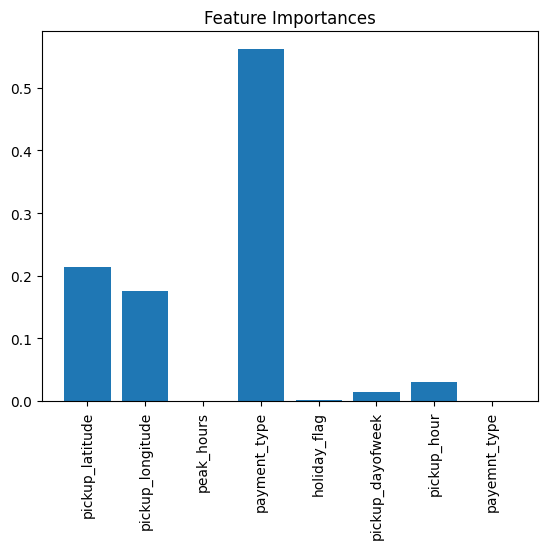

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.63      0.73    106085
           1       0.47      0.80      0.59     43473

    accuracy                           0.68    149558
   macro avg       0.68      0.71      0.66    149558
weighted avg       0.76      0.68      0.69    149558

AUC-ROC Score: 0.785370696748778


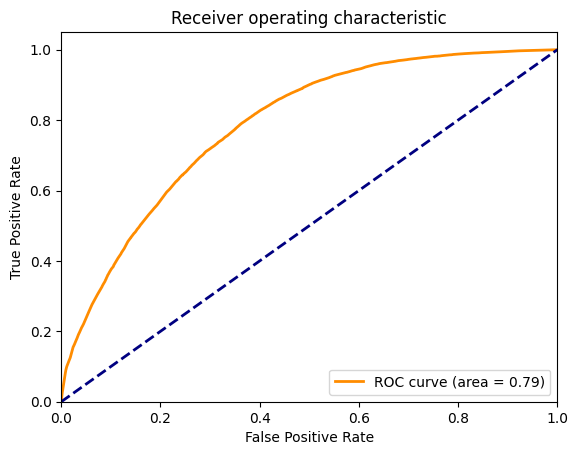

In [236]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# create the XGBoost classifier
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# fit the model to the training data
xgb.fit(X_train, y_train)

# calculate feature importances
importance = xgb.feature_importances_

# plot feature importances
plt.bar(range(len(importance)), importance)
plt.title("Feature Importances")
plt.xticks(range(len(importance)), X_train.columns, rotation=90)
plt.show()

# predict probabilities for test set
y_pred_prob = xgb.predict_proba(X_test)[:, 1]
y_pred = xgb.predict(X_test)


# display performance metrics

print("Classification Report:")
print(classification_report(y_test, y_pred))
# calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC Score:", auc_roc)

# calculate false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot AUC-ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [225]:

###KNN
def tuned_knn_classification(X_train, y_train, X_test, y_test, param_grid=None):
    # create the KNN classifier
    knn = KNeighborsClassifier()

    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(knn, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # make predictions on the test set using the best model
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)

    # display performance metrics
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
tuned_knn_classification(X_train,y_train,X_test,y_test)

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81    106085
           1       0.52      0.43      0.47     43473

    accuracy                           0.72    149558
   macro avg       0.65      0.63      0.64    149558
weighted avg       0.71      0.72      0.71    149558



In [226]:

####Random Forest
def tuned_rf_classification(X_train, y_train, X_test, y_test, param_grid=None):
    # create the random forest classifier
    rf = RandomForestClassifier()

    # set up the parameter grid for hyperparameter tuning
    if param_grid is None:
        param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}

    # perform grid search cross-validation to find the best hyperparameters
    grid_search = GridSearchCV(rf, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # make predictions on the test set using the best model
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)

    # display performance metrics
    print("Best Parameters:", grid_search.best_params_)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
tuned_rf_classification(X_train,y_train,X_test,y_test)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.65      0.74    106085
           1       0.48      0.78      0.59     43473

    accuracy                           0.69    149558
   macro avg       0.68      0.71      0.67    149558
weighted avg       0.76      0.69      0.70    149558

